[INFO] Put images to train...
[INFO] Process 500/3000
[INFO] Process 1000/3000
[INFO] Process 1500/3000
[INFO] Process 2000/3000
[INFO] Process 2500/3000
[INFO] Process 3000/3000
[INFO] Capacity of Matrix of Features: 9.0MB
[Evaluate Classifier k-NN ...]
              precision    recall  f1-score   support

         cat       0.41      0.62      0.50       262
         dog       0.42      0.47      0.44       249
       panda       0.87      0.29      0.43       239

    accuracy                           0.46       750
   macro avg       0.57      0.46      0.46       750
weighted avg       0.56      0.46      0.46       750



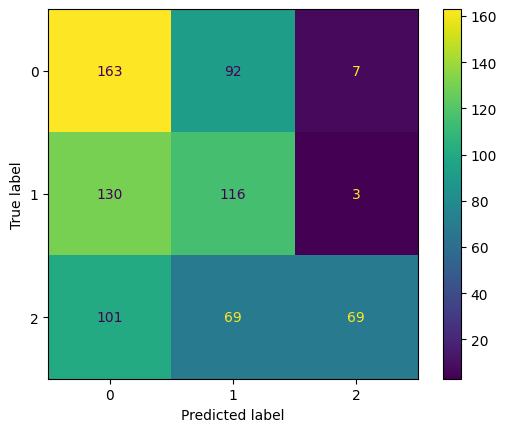

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib.pyplot import show
from imutils import paths
import pickle

from datasets.simpledatasetloader import SimpleDatasetLoader   # load data
from preprocessing.simplepreprocessor import SimplePreprocessor  # pre processing


print("[INFO] Put images to train...")
imagePaths = list(paths.list_images("datasets/animals"))


sp = SimplePreprocessor(32, 32)  # change size 32x32
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(imagePaths, verbose=500)  # load data, each 500 images
data = data.reshape((data.shape[0], 3072))

print("[INFO] Capacity of Matrix of Features: {:.1f}MB".format(data.nbytes / (1024 * 1000.0)))

le = LabelEncoder()  # encode lables: text -> int
labels = le.fit_transform(labels)

(trainData, testData, trainLabel, testLabel) = train_test_split(data, labels, test_size=0.25, random_state=42)

print("[Evaluate Classifier k-NN ...]")
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(trainData, trainLabel)

# Save file model by pickle
knnPickle = open('knnpickle_file.pkl', 'wb')
pickle.dump(model, knnPickle)

# Print metrics to evaluate model
print(classification_report(testLabel, model.predict(testData), target_names=le.classes_))

# Create matrix confusion
cm = confusion_matrix(testLabel, model.predict(testData))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
show()